<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/ProyectoProgADAP_261539.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: [Analisis y Prediccion de Defectos en Manufactura]
## Grupo: [B]
## Autor: [Sergio Trejo]
## Matrícula: [261539]
## Fecha: [1/9/2025]

# **1. Introducción**

## - Descripción del problema: ¿Qué queremos analizar o predecir?
  * En la manufactura, uno de los principales retos es reducir la cantidad de defectos en los productos terminados. Los defectos ocasionan retrabajos, desperdicio de materiales, mayores costos y retrasos en las entregas. Para mejorar la calidad es fundamental identificar qué factores del proceso influyen en la aparición de defectos y, con base en ello, anticipar problemas antes de que ocurran.

## - Objetivo del análisis: ¿Qué impacto tendrá este análisis?
  *  Obtener una visión descriptiva del comportamiento de las variables.  
  *  Descubrir patrones y relaciones que influyen en la calidad o defectos.  
  *  Construir un modelo predictivo que clasifique los lotes en alta o baja   cantidad de defectos con buena presición.  
## - Fuente de datos: ¿De dónde provienen los datos?
  * La fuente de datos viene de un origen secundario ya que este Dataset proviene de Kaggle, titulado *Predicting Manufacturing Defects Dataset*.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Captura y Carga de Datos**

## - Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
El dataset fue obtenido de la plataforma Kaggle, bajo el nombre *Predicting Manufacturing Defects Dataset* (https://www.kaggle.com/datasets/rabieelkharoua/predicting-manufacturing-defects-dataset). Está en formato CSV y son datos estructurados que contienen un total de 3240 registros (filas) y 17 variables (columnas).  
Las 16 variables independientes representan factores relacionados con producción, calidad, inventario, energía, mantenimiento y productividad; mientras que la variable objetivo, llamada DefectStatus, indica si un lote presenta alta cantidad de defectos (1) o baja cantidad de defectos (0).

Tipos de datos:  
- DefectStatus corresponde a un dato **cualitativo nominal** (variable categórica).  
- Cuatro variables son cuantitativas discretas (ProductionVolume, DeliveryDelay, MaintenanceHours, SafetyIncidents).  
- Doce variables son cuantitativas continuas (ProductionCost, SupplierQuality, DefectRate, QualityScore, DowntimePercentage, InventoryTurnover, StockoutRate, WorkerProductivity, EnergyConsumption, EnergyEfficiency, AdditiveProcessTime, AdditiveMaterialCost).  


Resumen: Este dataset es adecuado para aplicar técnicas de analítica descriptiva y predictiva porque cuenta con un número suficiente de observaciones, variables numéricas fáciles de manipular y una variable objetivo binaria que permite desarrollar modelos de clasificación.


## - Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)

- El dataset se cargó correctamente con 3240 filas y 17 columnas.  
- No se detectaron problemas de codificación ni de delimitadores.  
- Los nombres de las variables en las columnas están correctamente estructurados para su análisis. Ya vienen en formato camel case.

In [ ]:
import pandas as pd
import numpy as np

#Cargar el dataset desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/manufacturing_defect_dataset.csv', encoding='latin1')

#dimensiones del DataSet
print("\nDimensiones del DataSet:\n ", df.shape)
print(df.head())
print(df.info())


Dimensiones del DataSet:
  (3240, 17)
   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           8.630515      0.081322          

#**3.Transformación y Preprocesamiento - Data Wrangling**

## - Identificación de Tipos de Datos
  * Al revisar el dataset se encontró que todas las variables son de tipo numérico en Python (`int64` y `float64`). Según su naturaleza:  
  * DefectStatus es una variable cualitativa nominal (categórica binaria).  
  * 4 variables son cuantitativas discretas: ProductionVolume, DeliveryDelay, MaintenanceHours, SafetyIncidents.  
  * 12 variables son cuantitativas continuas: ProductionCost, SupplierQuality, DefectRate, QualityScore, DowntimePercentage, InventoryTurnover, StockoutRate, WorkerProductivity, EnergyConsumption, EnergyEfficiency, AdditiveProcessTime, AdditiveMaterialCost.  

## - Cantidad de Valores nulos
  * Al aplicar `df.isna().sum()` se encontró que **ninguna columna contiene valores nulos**. El dataset está completo y no requiere imputar o remplazar valores nulos.

## - Outliers
* ProductionCost: presenta el rango más amplio (≈ 5,000 a 20,000). Se observan valores extremos que podrían considerarse outliers, ya que se alejan bastante de la mediana.

* EnergyConsumption: muestra dispersión amplia (≈ 1,000 a 5,000). Aparecen algunos valores fuera de los bigotes, posibles outliers.

* ProductionVolume y AdditiveMaterialCost: tienen rangos acotados pero con algunos valores atípicos detectables en los extremos.

* SupplierQuality, WorkerProductivity y la mayoría de las variables de calidad/operaciones: sus boxplots son compactos, concentrados alrededor de sus medianas. No se aprecian outliers significativos.

* DeliveryDelay, MaintenanceHours, SafetyIncidents, StockoutRate: muestran distribuciones muy reducidas y estables, sin valores anómalos visibles.

## -Duplicados
* En este dataset no se encontraron registros duplicados

##- Explicación sobre cada una de las problemáticas encontradas, las soluciones y el código

  * Tipos de datos: Todos los tipos son correctos, no fue necesario convertir columnas.  
  *  Valores nulos: No se detectaron, por lo que no fue necesario realizar cambios.
  * Escalas diferentes: Las variables están en rangos distintos (por ejemplo ProductionCost esta en miles, mientras que SupplierQuality o   WorkerProductivity que estan en randos de 0 a 100).  
  * Balance de clases: La variable DefectStatus está desbalanceada (84 % clase 1 y 16 % clase 0).  
  * Outliers: Se recomienda revisar valores extremos con boxplots u otro metodo. En este dataset no aparecen nulos ni valores fuera de rango, pero este paso será considerado en la exploración de datos.

                                  Variable Tipo de dato  Valores nulos
ProductionVolume          ProductionVolume        int64              0
ProductionCost              ProductionCost      float64              0
SupplierQuality            SupplierQuality      float64              0
DeliveryDelay                DeliveryDelay        int64              0
DefectRate                      DefectRate      float64              0
QualityScore                  QualityScore      float64              0
MaintenanceHours          MaintenanceHours        int64              0
DowntimePercentage      DowntimePercentage      float64              0
InventoryTurnover        InventoryTurnover      float64              0
StockoutRate                  StockoutRate      float64              0
WorkerProductivity      WorkerProductivity      float64              0
SafetyIncidents            SafetyIncidents        int64              0
EnergyConsumption        EnergyConsumption      float64              0
Energy

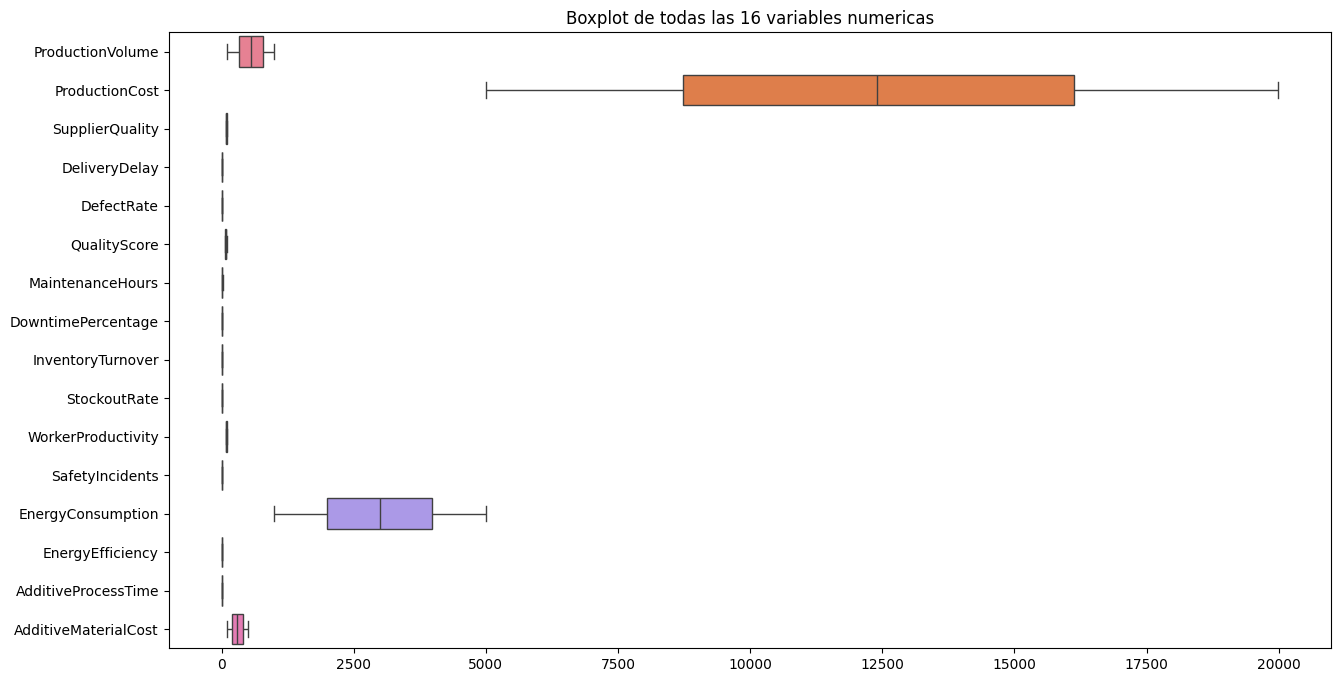

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Crear un dataFrame llamado diccionario con el nombre de  variable, tipo de dato, y valores nulos:
diccionario = pd.DataFrame({"Variable": df.columns,"Tipo de dato": df.dtypes.astype(str),"Valores nulos": df.isna().sum()})
print(diccionario)
#Revisar si hay datos duplicados
print("\nCantidad de duplicados: \n ", df.duplicated().sum())


#Revision de outliers
columnas_numericas = df.drop(columns=['DefectStatus']).select_dtypes(include=['int64','float64']).columns
#Boxplot de todas las columnas numericas
plt.figure(figsize=(15,8))
sns.boxplot(data=df[columnas_numericas],orient="h")
plt.title('Boxplot de todas las 16 variables numericas')
plt.show()





## **4. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD
1. ¿Cuál es el promedio de calidad de los proveedores (SupplierQuality)? -> mostrar la tendencia central de la calidad del proveedor.  
2. ¿Cuál es la productividad media de los trabajadores (WorkerProductivity)? -> resume el desempeño de mano de obra.
3. ¿Cuál es el rango de costos de producción (ProductionCost)? -> indica la variación entre costo mínimo y máximo.  
4. ¿Las observaciones con defectos altos y bajos tienen diferente variación en calidad de proveedores (SupplierQuality)? -> comparar la dispersión entre grupos.  
5. ¿Cómo se distribuyen los valores de calidad de proveedores(SupplierQuality)? -> permite ver concentración o valores extremos.  
6. ¿Cómo se reparte DefectStatus entre defectos bajos (0) y altos (1)? -> muestra la proporción de cada categoría.

## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas
La mayoría de las observaciones (84 %) corresponden a defectos altos y solo el 16 % a defectos bajos, lo que muestra un desbalance en los datos.
- SupplierQuality tiene valores concentrados entre 80 y 100, con una media cercana al 90 %.  
- WorkerProductivity también se concentra en valores altos, lo que refleja un desempeño estable del personal.  
- ProductionCost presenta un rango amplio (de alrededor de 5000 a 20000), lo que indica variabilidad en los costos de producción.  
- Al comparar SupplierQuality entre defectos bajos y altos mediante boxplots, se observa que la dispersión es muy parecida en ambos grupos, con una diferencia mínima en la mediana. Esto nos indica que la calidad del proveedor no explica de manera clara la diferencia en defectos.

       SupplierQuality  WorkerProductivity  ProductionCost
count      3240.000000         3240.000000     3240.000000
mean         89.833290           90.040115    12423.018476
std           5.759143            5.723600     4308.051904
min          80.004820           80.004960     5000.174521
25%          84.869219           85.180203     8728.829280
50%          89.704861           90.125743    12405.204656
75%          94.789936           95.050838    16124.462428
max          99.989214           99.996786    19993.365549


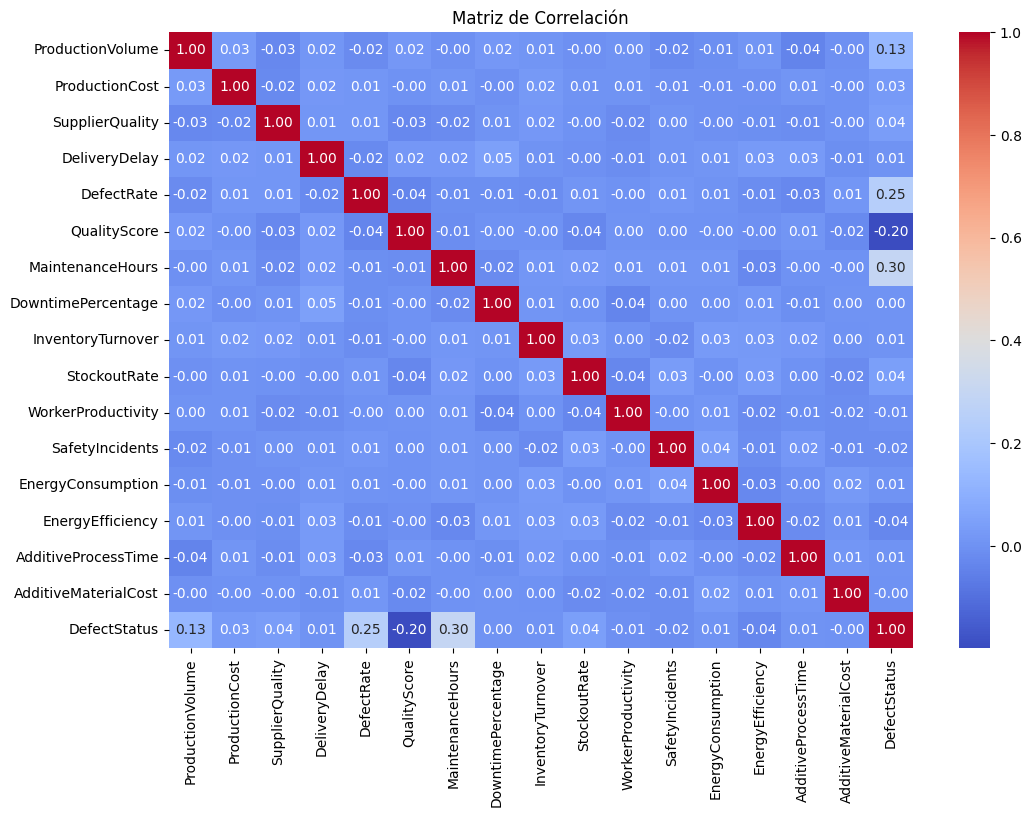

In [ ]:
import plotly.express as px
import seaborn as sns

#Estadisticas basicas aplicadas
estadisticas = df[['SupplierQuality', 'WorkerProductivity', 'ProductionCost']].describe()
print(estadisticas)

#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación")
plt.show()

# 1. Proporcion de DefecStatus
fig = px.histogram(df, x="DefectStatus", color="DefectStatus", text_auto=True,title="Proporción de DefectStatus (0 = Bajo, 1 = Alto)")
fig.update_layout(xaxis_title="DefectStatus", yaxis_title="Frecuencia",barmode="group")
fig.show()

# 2. Distribución de SupplierQuality
fig2 = px.histogram(df, x="SupplierQuality", nbins=20, text_auto=True,title="Distribución de SupplierQuality")
fig2.show()

# 3. Distribución de WorkerProductivity
fig3 = px.histogram(df, x="WorkerProductivity", nbins=20, text_auto=True,title="Distribución de WorkerProductivity")
fig3.show()

# 4. Distribución de ProductionCost
fig4 = px.histogram(df, x="ProductionCost", nbins=20, text_auto=True,title="Distribución de ProductionCost")
fig4.show()

# 5. Comparación de SupplierQuality por DefectStatus (boxplot)
fig5 = px.box(df, x="DefectStatus", y="SupplierQuality",title="SupplierQuality segun DefectStatus")
fig5.show()




# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder
## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

# **6. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código

## - Modelado Predictivo
### - Modelo elegido y parámetros
### - Entrenamiento y Evaluación
## - Resultados


# **7. Conclusiones y Trabajos Futuros**

## - Resumen del trabajo realizado, hallazgos y posibles mejoras